# Linear Regression Lab

## Simple Linear Regression

In [70]:
import pandas as pd
import statsmodels.formula.api as smf
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

In [34]:
path = Path('..\\resources\\ALL CSV FILES - 2nd Edition\\Boston.csv')

boston_df = pd.read_csv(path, header=0, index_col=0)

boston_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [41]:
linear_model = smf.ols('medv~lstat', data = boston_df).fit()

In [42]:
print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Sun, 21 Aug 2022   Prob (F-statistic):           5.08e-88
Time:                        02:05:15   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.0

In [61]:
print(linear_model.params)
print('-'*10)
print(linear_model.conf_int())
print('-'*10)
print(linear_model.rsquared)
print('-'*10)
print(linear_model.rsquared_adj)
print('-'*10)
print(linear_model.mse_model)
print('-'*10)
print(linear_model.mse_resid)

Intercept    34.553841
lstat        -0.950049
dtype: float64
----------
                   0          1
Intercept  33.448457  35.659225
lstat      -1.026148  -0.873951
----------
0.5441462975864799
----------
0.543241825954707
----------
23243.913996693333
----------
38.63567741731436


In [62]:
linear_model.predict(pd.DataFrame({'lstat':[5, 10, 15]}))

0    29.803594
1    25.053347
2    20.303101
dtype: float64

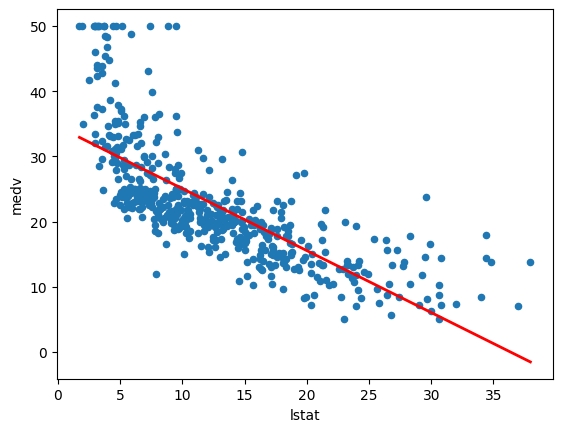

In [67]:
X_new = pd.DataFrame({'lstat': [boston_df.lstat.min(), boston_df.lstat.max()]})
preds = linear_model.predict(X_new)
boston_df.plot(kind='scatter', x='lstat', y='medv')
plt.plot(X_new, preds, c='red', linewidth=2)
plt.show()

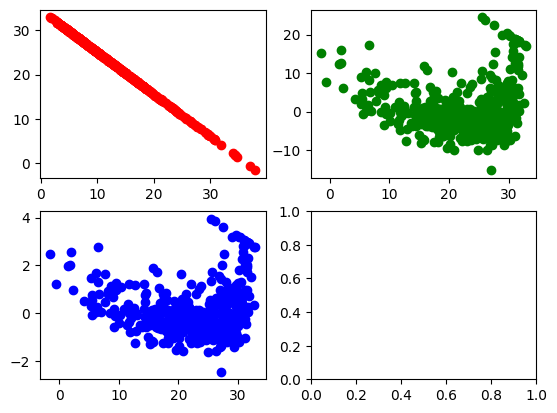

In [69]:
fig, ((ax1, ax2), (ax3, ax4))= plt.subplots(2, 2)
ax1.plot(boston_df.lstat, linear_model.predict(),'ro')
ax2.plot(linear_model.predict(), linear_model.resid, 'go')
ax3.plot(linear_model.predict(), linear_model.resid_pearson, 'bo')
plt.show()

In [71]:
dir(linear_model.get_influence())
np.argmax(linear_model.get_influence().hat_matrix_diag)

374

## Multiple Linear Regression

In [73]:
multiple_linear_model = smf.ols ('medv~lstat+age', data = boston_df).fit()
print(multiple_linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Sun, 21 Aug 2022   Prob (F-statistic):           2.98e-88
Time:                        02:22:10   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.2228      0.731     45.458      0.0

In [74]:
all_columns = "+".join(boston_df.columns.difference(["medv"]))
my_formula = "medv~" + all_columns
multiple_linear_model = smf.ols(my_formula, data=boston_df).fit()
print(multiple_linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     113.5
Date:                Sun, 21 Aug 2022   Prob (F-statistic):          2.23e-133
Time:                        02:23:01   Log-Likelihood:                -1504.9
No. Observations:                 506   AIC:                             3036.
Df Residuals:                     493   BIC:                             3091.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.6173      4.936      8.431      0.0